### Data Analysis & train_test_split

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/home/julia/miniconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/julia/miniconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/julia/miniconda3/envs/deeplearning_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/julia/mini

In [2]:
#Import the images from 11 artists I need for my training
images_dir = '../data_images/resized/resized_train_test'
data_artists = pd.read_csv('../data/processed/data_artists.csv')
artists_dirs = os.listdir(images_dir)
artists_top_name = data_artists['name'].str.replace(' ', '_').values

# See if all directories exist
for name in artists_top_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))


Found --> ../data_images/resized/resized_train_test/Vincent_van_Gogh
Found --> ../data_images/resized/resized_train_test/Pablo_Picasso
Found --> ../data_images/resized/resized_train_test/Pierre-Auguste_Renoir
Found --> ../data_images/resized/resized_train_test/Francisco_Goya
Found --> ../data_images/resized/resized_train_test/Albrecht_Dürer
Found --> ../data_images/resized/resized_train_test/Alfred_Sisley
Found --> ../data_images/resized/resized_train_test/Marc_Chagall
Found --> ../data_images/resized/resized_train_test/Edgar_Degas
Found --> ../data_images/resized/resized_train_test/Rembrandt
Found --> ../data_images/resized/resized_train_test/Titian
Found --> ../data_images/resized/resized_train_test/Paul_Gauguin


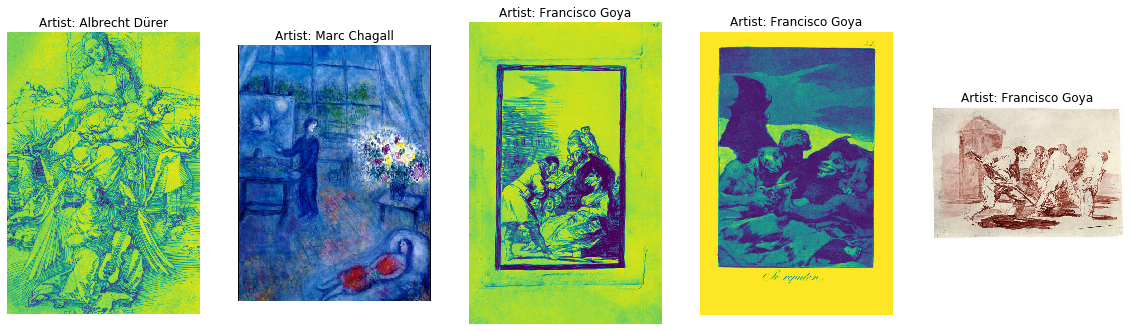

In [3]:
#See if images have been imported correctly 
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

In [14]:
#Train_test_split
BS = 2633
EPOCHS = 100
def generators(shape, preprocessing): 
    imgdatagen = ImageDataGenerator(preprocessing_function = preprocessing,horizontal_flip = True,validation_split = 0.1)
    height, width = shape
    train_dataset = imgdatagen.flow_from_directory(os.getcwd(),target_size = (height, width),classes = (artists_top_name),batch_size = batch_size,subset = 'training')
    val_dataset = imgdatagen.flow_from_directory(os.getcwd(),target_size = (height, width), classes = (artists_top_name),batch_size = batch_size,subset = 'validation')
    return train_dataset, val_dataset

In [16]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX), BS=2633, epochs=EPOCHS)

NameError: name 'model' is not defined

In [17]:
#train_dataset.shape